In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities

['waitangi',
 'gogrial',
 'georgetown',
 'adamstown',
 'tolanaro',
 'bargara',
 'tual',
 'sim',
 'ribeira grande',
 'smithers',
 'qaqortoq',
 'whitehorse',
 'invercargill',
 'saipan',
 'san patricio',
 'margate',
 'margaret river',
 'burabay',
 'avarua',
 'thompson',
 'suva',
 'port-aux-francais',
 'alotau',
 'wailua homesteads',
 'hinis',
 'hammerfest',
 'blackmans bay',
 'petropavlovsk-kamchatsky',
 'vadso',
 'barra do garcas',
 'mount isa',
 'filadelfia',
 'akureyri',
 'geraldton',
 'newman',
 'sena madureira',
 'yellowknife',
 'puerto natales',
 'crucecita',
 'al-`ula',
 'alice springs',
 'priozersk',
 'edinburgh of the seven seas',
 'ayr',
 'utrik',
 'raton',
 'bredasdorp',
 'hawaiian paradise park',
 'porto velho',
 'rio preto da eva',
 'codrington',
 'iqaluit',
 'grytviken',
 'tranovaho',
 'horta',
 'ust-nera',
 'kijang',
 'akobo',
 'tiksi',
 'mejit',
 'itarare',
 'dadonghai',
 'ushuaia',
 'cabo san lucas',
 'barbalha',
 'craig',
 'prince albert',
 'idrinskoye',
 'mount pearl',


In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
count = 1

lat = []
lon = []
m_temp = []
hum = []
cloud = []
wind = []
country = []
date = []

for x in cities:
    response = requests.get(url + weather_api_key + "&q=" + x).json()
    
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        m_temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print("Processing record", count ,"|", x)
        count = count + 1
    except KeyError:
        lat.append("")
        lon.append("")
        m_temp.append("")
        hum.append("")
        cloud.append("")
        wind.append("")
        country.append("")
        date.append("")
        print("Processing record", count ,"|", x, " |City not found")
        count = count + 1
        pass

Processing record 1 | waitangi
Processing record 2 | gogrial
Processing record 3 | georgetown
Processing record 4 | adamstown
Processing record 5 | tolanaro
Processing record 6 | bargara  |City not found
Processing record 7 | tual
Processing record 8 | sim
Processing record 9 | ribeira grande
Processing record 10 | smithers
Processing record 11 | qaqortoq
Processing record 12 | whitehorse
Processing record 13 | invercargill
Processing record 14 | saipan
Processing record 15 | san patricio
Processing record 16 | margate
Processing record 17 | margaret river
Processing record 18 | burabay
Processing record 19 | avarua
Processing record 20 | thompson
Processing record 21 | suva
Processing record 22 | port-aux-francais
Processing record 23 | alotau  |City not found
Processing record 24 | wailua homesteads
Processing record 25 | hinis
Processing record 26 | hammerfest
Processing record 27 | blackmans bay
Processing record 28 | petropavlovsk-kamchatsky
Processing record 29 | vadso
Processing

In [6]:
weather_df = pd.DataFrame({"Cities" : cities, "Lat" : lat, "Lng" : lon, "Max Temp" : m_temp, "Humidity" : hum, "Cloudiness" : cloud, 
                           "Wind Speed" : wind, "Country" : country, "Date" : date})
weather_df.replace('', np.nan, inplace=True)
weather_df.dropna(inplace=True)
weather_df

Cities    Lat     Lng  Max Temp  Humidity  Cloudiness  \
0             castro -24.79  -50.01     60.80      77.0         4.0   
1    bambous virieux -20.34   57.76     71.60      78.0        40.0   
2     port elizabeth -33.92   25.57     46.40      81.0         0.0   
3     severo-kurilsk  50.68  156.12     49.78      92.0       100.0   
4            rikitea -23.12 -134.97     71.11      72.0         0.0   
..               ...    ...     ...       ...       ...         ...   
616          yenagoa   4.92    6.26     74.41      94.0        95.0   
617         samandag  36.08   35.98     80.60      74.0        20.0   
618          chapais  49.78  -74.85     62.60      88.0        90.0   
619          talnakh  69.49   88.40     53.60      81.0        75.0   
620     constitucion -35.33  -72.42     53.67      81.0       100.0   

     Wind Speed Country          Date  
0          7.31      BR  1.594591e+09  
1         13.87      MU  1.594591e+09  
2          1.12      ZA  1.594591e+09  
3          8.46      RU  1.594591e+09  
4         16.62      PF  1.594591e+09  
..          ...     ...           ...  
616        3.47      NG  1.594591e+09  
617       14.99      TR  1.594591e+09  
618       10.29      CA  1.594591e+09  
619        4.47      RU  1.594591e+09  
620        6.60      CL  1.594591e+09  

[567 rows x 9 columns]

In [7]:
weather_df["Humidity"].max()

100.0

In [8]:
weather_df.to_csv("output_data/cities.csv", index=False)

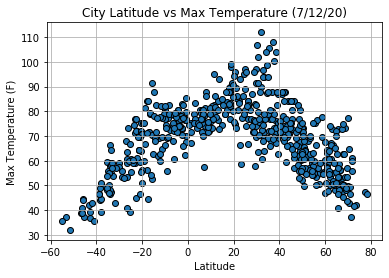

In [14]:
max_temp_y = weather_df["Max Temp"]
lat_x = weather_df["Lat"]
plt.scatter(lat_x, max_temp_y, edgecolors="black")
plt.grid()

plt.title("City Latitude vs Max Temperature (7/12/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("output_data/scatter_lat_temp.png")

#chart indicating a curvilinear relationship between Max Temp and Latitude 
#with lower temps recorded further away from 0 latitude and higher temps in the 10-40 latitude range.

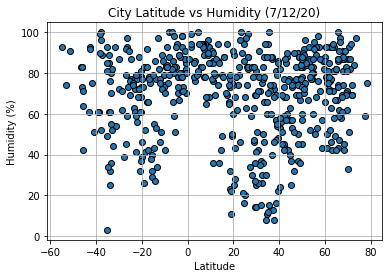

In [16]:
humidity_y = weather_df["Humidity"]
lat_x = weather_df["Lat"]
plt.scatter(lat_x, humidity_y, edgecolors="black")
plt.grid()

plt.title("City Latitude vs Humidity (7/12/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/scatter_lat_hum.png")

#chart indicating the relationship between Humidity and Latitude.  
#It appears that there is not a strong correlation between these variables

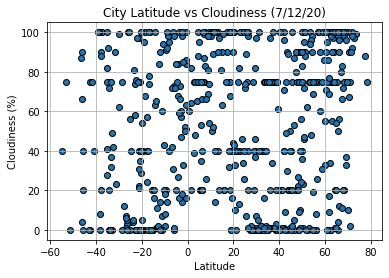

In [17]:
cloud_y = weather_df["Cloudiness"]
lat_x = weather_df["Lat"]
plt.scatter(lat_x, cloud_y, edgecolors="black")
plt.grid()

plt.title("City Latitude vs Cloudiness (7/12/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/scatter_lat_cloud.png")

#chart indicating the relationship between Cloudiness and Latitude.  
#It appears that there is not a strong correlation between these variables

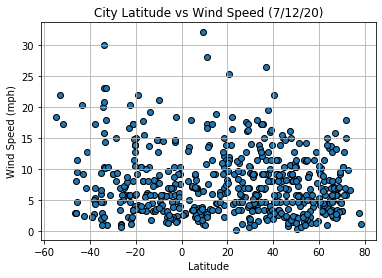

In [19]:
wind_y = weather_df["Wind Speed"]
lat_x = weather_df["Lat"]
plt.scatter(lat_x, wind_y, edgecolors="black")
plt.grid()

plt.title("City Latitude vs Wind Speed (7/12/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/scatter_lat_wind.png")

#chart indicating the relationship between Cloudiness and Wind Speed.  
#It appears that there is not a strong correlation between these variables

In [21]:
weather_nh = weather_df[weather_df.Lat > 0]
weather_sh = weather_df[weather_df.Lat < 0]
weather_nh

Cities    Lat     Lng  Max Temp  Humidity  Cloudiness  \
3    severo-kurilsk  50.68  156.12     49.78      92.0       100.0   
8            itoman  26.12  127.67     84.20      83.0        75.0   
9            dikson  73.51   80.55     42.13      97.0        99.0   
11            tiksi  71.69  128.87     61.29      69.0       100.0   
14           tiznit  29.58   -9.50     83.05      36.0        82.0   
..              ...    ...     ...       ...       ...         ...   
615        tessalit  20.20    1.01     94.15      25.0        43.0   
616         yenagoa   4.92    6.26     74.41      94.0        95.0   
617        samandag  36.08   35.98     80.60      74.0        20.0   
618         chapais  49.78  -74.85     62.60      88.0        90.0   
619         talnakh  69.49   88.40     53.60      81.0        75.0   

     Wind Speed Country          Date  
3          8.46      RU  1.594591e+09  
8          3.36      JP  1.594591e+09  
9          6.55      RU  1.594591e+09  
11         5.88      RU  1.594591e+09  
14         0.72      MA  1.594591e+09  
..          ...     ...           ...  
615       10.94      ML  1.594591e+09  
616        3.47      NG  1.594591e+09  
617       14.99      TR  1.594591e+09  
618       10.29      CA  1.594591e+09  
619        4.47      RU  1.594591e+09  

[385 rows x 9 columns]

R value =  -0.66
R squared =  0.44
p value = 1.604421664713819e-49 , significant at the alpha of .05


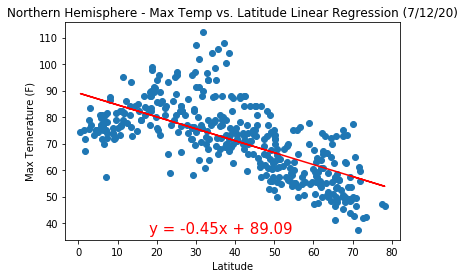

In [42]:
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_nh["Lat"], weather_nh["Max Temp"])
regress_values = weather_nh["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_nh["Lat"], weather_nh["Max Temp"])
plt.plot(weather_nh["Lat"],regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temerature (F)')    
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (7/12/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("output_data/regnh_lat_temp.png")

#there is a significant negative correlation between latitude and Max Temperature in the Northern Hemisphere, 
#where that 44% of the variability seen in Max Temperature can be attributed to the Latitude variable. 

R value =  0.81
Rsquared =  0.65
p value = 3.7558596192763524e-43 , significant at the alpha of .05


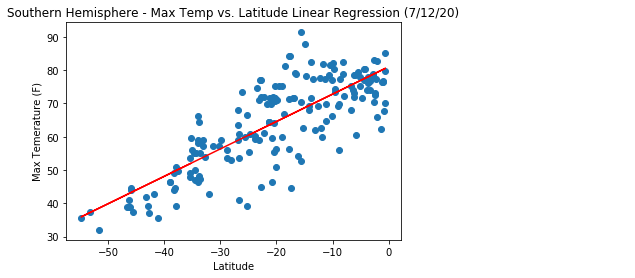

In [43]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_sh["Lat"], weather_sh["Max Temp"])
regress_values = weather_sh["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_sh["Lat"], weather_sh["Max Temp"])
plt.plot(weather_sh["Lat"],regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temerature (F)')    
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (7/12/20)")
print("R value = ", round(rvalue,2))
print("Rsquared = ", round(rvalue*rvalue,2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("output_data/regsh_lat_temp.png")

#there is a significant positive correlation between latitude and Max Temperature in the Southern Hemisphere, 
#where that 65% of the variability seen in Max Temperature can be attributed to the Latitude variable. 

R value =  -0.02
R squared =  0.0
p value = 0.6760961358307735 , not significant at the alpha of .05


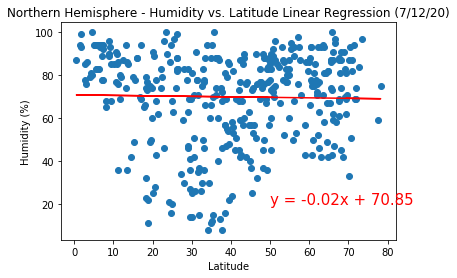

In [44]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_nh["Lat"], weather_nh["Humidity"])
regress_values = weather_nh["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_nh["Lat"], weather_nh["Humidity"])
plt.plot(weather_nh["Lat"],regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')    
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression (7/12/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", not significant at the alpha of .05")
plt.savefig("output_data/regnh_lat_hum.png")

#there is no significant correlation between latitude and Humidity in the Northern Hemisphere,  

R value =  0.14
R squared =  0.02
p value = 0.0674408447308329 , not significant at the alpha of .05


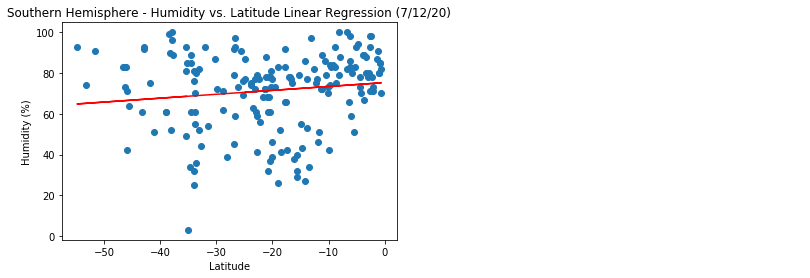

In [45]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_sh["Lat"], weather_sh["Humidity"])
regress_values = weather_sh["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_sh["Lat"], weather_sh["Humidity"])
plt.plot(weather_sh["Lat"],regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')    
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression (7/12/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", not significant at the alpha of .05")
plt.savefig("output_data/regsh_lat_hum.png")

#there is no significant correlation between latitude and Humidity in the Southern Hemisphere,  

R value =  0.05
R squared =  0.0
p value = 0.3623855768866766 , not significant at the alpha of .05


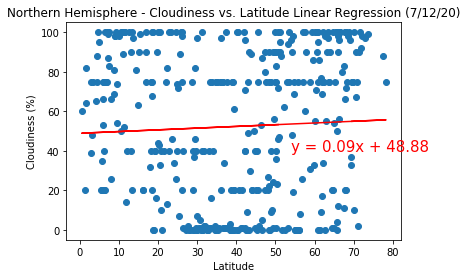

In [54]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_nh["Lat"], weather_nh["Cloudiness"])
regress_values = weather_nh["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_nh["Lat"], weather_nh["Cloudiness"])
plt.plot(weather_nh["Lat"],regress_values,"r-")
plt.annotate(line_eq,(54,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')    
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression (7/12/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", not significant at the alpha of .05")
plt.savefig("output_data/regnh_lat_cloud.png")

#there is no significant correlation between latitude and Cloudiness in the Northern Hemisphere,

R value =  0.13
R squared =  0.02
p value = 0.08679929125991782 , not significant at the alpha of .05


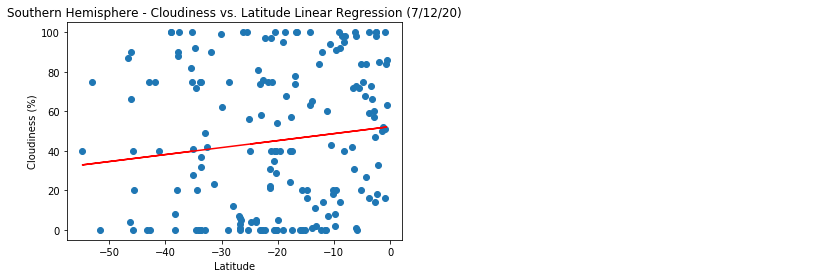

In [55]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_sh["Lat"], weather_sh["Cloudiness"])
regress_values = weather_sh["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_sh["Lat"], weather_sh["Cloudiness"])
plt.plot(weather_sh["Lat"],regress_values,"r-")
plt.annotate(line_eq,(54,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')    
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression (7/12/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", not significant at the alpha of .05")
plt.savefig("output_data/regsh_lat_cloud.png")

#there is no significant correlation between latitude and Cloudiness in the Southern Hemisphere,

R value =  -0.09
R squared =  0.01
p value = 0.08885276721028357 , not significant at the alpha of .05


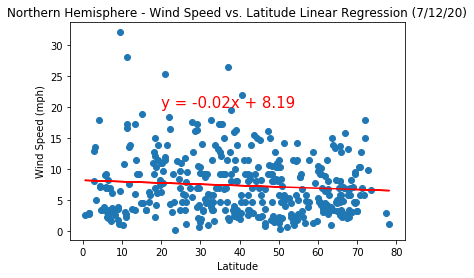

In [58]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_nh["Lat"], weather_nh["Wind Speed"])
regress_values = weather_nh["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_nh["Lat"], weather_nh["Wind Speed"])
plt.plot(weather_nh["Lat"],regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')    
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression (7/12/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", not significant at the alpha of .05")
plt.savefig("output_data/regnh_lat_wind.png")

#there is no significant correlation between latitude and Wind Speed in the Northern Hemisphere,

R value =  -0.19
R squared =  0.04
p value = 0.008941276814822607 , significant at the alpha of .05


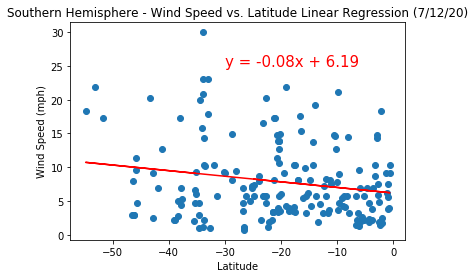

In [65]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_sh["Lat"], weather_sh["Wind Speed"])
regress_values = weather_sh["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_sh["Lat"], weather_sh["Wind Speed"])
plt.plot(weather_sh["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')    
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression (7/12/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("output_data/regsh_lat_wind.png")

#there is a significant negative correlation between latitude and Wind Speed in the Southern Hemisphere,
#where 4% of the variability in Wind Speed can be attributed to Latitude. 

In [ ]:
# Final Observations:

# 1. There is a significant correlation between latitude and Max Temp as run on July 12, 2020.
#    so that the further away from the equator, the warmer the max temperature
#    The effect size is stronger in the southern hemisphere (r2 = .65), than in the northern (r2 = .44)

# 2. Latitude is not a significant preditor of Humidity, Cloudiness, or Wind Speed

# 3. It would be interesting to run the same numbers or these variables in the Winter to see if time of year impacts
#    the strength of the relationships between the variables.